# Intro
This project is about to learn how to apply machine learning with the help of the scikit library. To do this I will use Sales_Win_Loss data from IBM's Watson repository.

Goal is to build a predictive model to tell which sales campaign will result in a loss and which will rersult in a win.

At first I start with an quick overview and then dive into scikit learn.

In [1]:
import pandas as pd

#read in the data
sales_data = pd.read_csv("WA_Fn-UseC_-Sales-Win-Loss.csv")

## getting a n overview

In [2]:
#take a look on top of the dataset
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


In [3]:
#looking on the tail of the dataset
sales_data.tail()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.0,0.0,0.0,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.0,0.0,0.0,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.0,0.0,0.0,5
78024,10094255,Interior Accessories,Car Accessories,Mid-Atlantic,Reseller,0,Loss,1,0,0,90000,1,1,0,Unknown,0.0,0.0,0.0,4


In [4]:
#looking on different datatypes in the dataset
sales_data.dtypes

Opportunity Number                           int64
Supplies Subgroup                           object
Supplies Group                              object
Region                                      object
Route To Market                             object
Elapsed Days In Sales Stage                  int64
Opportunity Result                          object
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                             object
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

## visualize data

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#set background color of plot
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a count plot
colors = ["#6279B8", "#4C9F70"]
sns.countplot('Route To Market', data=sales_data, hue='Opportunity Result', palette=colors)

# remove the top and down margin
sns.despine(offset=10, trim=True)

# display plot
plt.show()

<Figure size 1170x827 with 1 Axes>

### notes
no matter which route to market: there are always more records of type "loss".
also most records are on Fields Sales and Reseller.
Fileds Sales has more losses than Reseller.

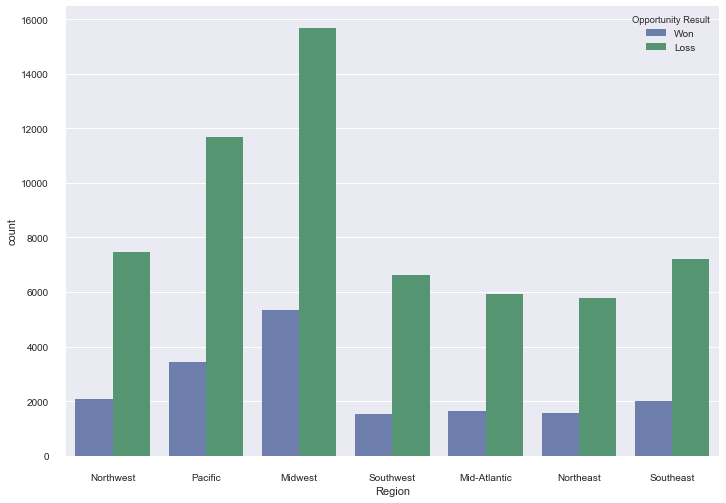

In [6]:
#set background color of plot
sns.set(style="whitegrid", color_codes=True)

# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

# create a count plot
colors = ["#6279B8", "#4C9F70"]
sns.countplot('Region', data=sales_data, hue='Opportunity Result', palette=colors)

# remove the top and down margin
sns.despine(offset=10, trim=True)

# display plot
plt.show()

### notes
most records are in Pacific and Midwest region. here too: more loss than win records, no matter which region.

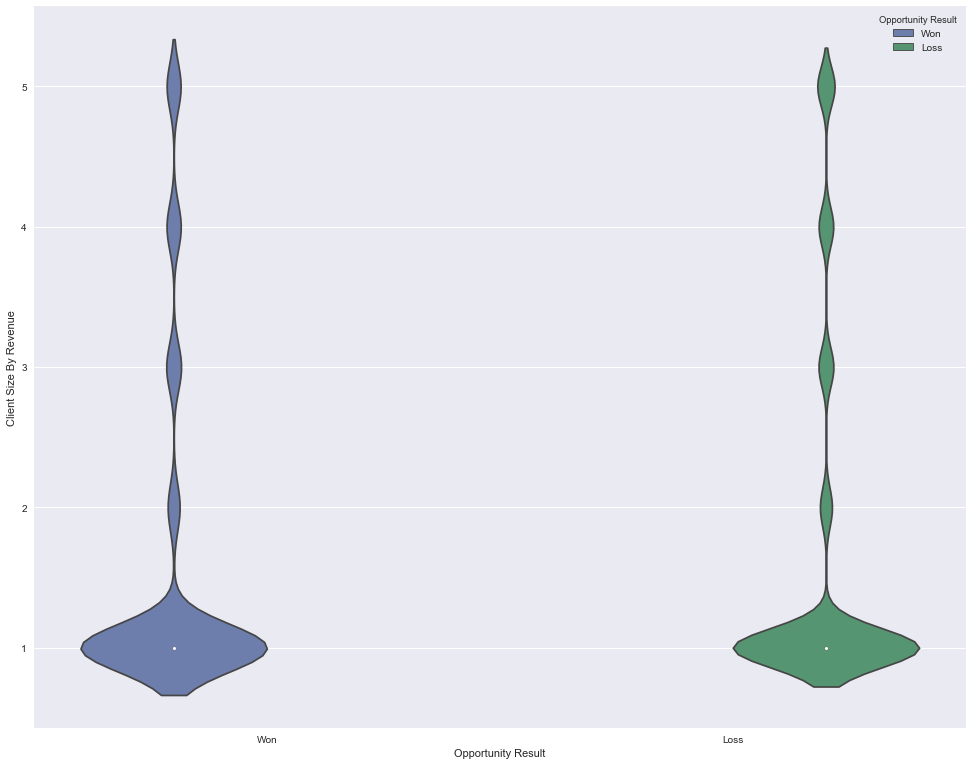

In [7]:
# creating a violn plot
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x='Opportunity Result', y='Client Size By Revenue', hue='Opportunity Result', data=sales_data, palette=colors)
plt.show()

### notes
the violin plot displays the distribution of the data across labels. the largest concentration of data is in the client size "1".

## preprocessing data
converting categorical columns into numeric columns because machine learning algorithms in scikit-learn understand only numeric inputs.

In [8]:
# take a short view on the unique values of the string labels of the dataset
print("Supplies Subgroup: ", sales_data["Supplies Subgroup"].unique())
print("Region: ", sales_data["Region"].unique())
print("Route To Market: ", sales_data["Route To Market"].unique())
print("Opportunity Result: ", sales_data["Opportunity Result"].unique())
print("Competitor Type: ", sales_data["Competitor Type"].unique())
print("Supplies Group: ", sales_data["Supplies Group"].unique())

Supplies Subgroup:  ['Exterior Accessories' 'Motorcycle Parts' 'Shelters & RV'
 'Garage & Car Care' 'Batteries & Accessories' 'Performance Parts'
 'Towing & Hitches' 'Replacement Parts' 'Tires & Wheels'
 'Interior Accessories' 'Car Electronics']
Region:  ['Northwest' 'Pacific' 'Midwest' 'Southwest' 'Mid-Atlantic' 'Northeast'
 'Southeast']
Route To Market:  ['Fields Sales' 'Reseller' 'Other' 'Telesales' 'Telecoverage']
Opportunity Result:  ['Won' 'Loss']
Competitor Type:  ['Unknown' 'Known' 'None']
Supplies Group:  ['Car Accessories' 'Performance & Non-auto' 'Tires & Wheels'
 'Car Electronics']


In [9]:
from sklearn import preprocessing

# label encoder object
le = preprocessing.LabelEncoder()

# convert the categorical cols into numeric
sales_data["Supplies Subgroup"] = le.fit_transform(sales_data["Supplies Subgroup"])
sales_data["Region"] = le.fit_transform(sales_data["Region"])
sales_data["Route To Market"] = le.fit_transform(sales_data["Route To Market"])
sales_data["Opportunity Result"] = le.fit_transform(sales_data["Opportunity Result"])
sales_data["Competitor Type"] = le.fit_transform(sales_data["Competitor Type"])
sales_data["Supplies Group"] = le.fit_transform(sales_data["Supplies Group"])

# check if everything is converted
sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


## selecting features

In [10]:
# select all columns other than "Opportunity Number" and "Oppertunity Result"
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

# dropping the cols "Opportunity Number" and "Oppertunity Result"
data = sales_data[cols]

# assign "Opportunity Result" as target
target = sales_data['Opportunity Result']

data.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


## training set and test set

In [11]:
from sklearn.model_selection import train_test_split

# split the dataset into train and test sets
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size = 0.30, random_state = 10)

## gaussian naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# object of GaussianNB
gnb = GaussianNB()

# train algorithm on train data. then predict on testing data
pred = gnb.fit(data_train, target_train).predict(data_test)

## print accuracy score of the model
print("Naive-Bayes accuracy: ", accuracy_score(target_test, pred, normalize=True))

Naive-Bayes accuracy:  0.7590567327409433


## k-neighbors classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#create classifier object
neigh = KNeighborsClassifier(n_neighbors=3)

#train algorithm
neigh.fit(data_train, target_train)

# prediction
pred = neigh.predict(data_test)

# print accuracy score
print('KNeighbors accuracy: ', accuracy_score(target_test, pred))

KNeighbors accuracy:  0.8145505809979494


## linearSVC

In [14]:
from sklearn.svm import LinearSVC

#create linearSVC object 
svc_model = LinearSVC(random_state=0)

#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)

#print the accuracy score 
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.46355946684894056


## performance comparison
for this purpose the ClassificationReport provided by the Yellowbrick library will give a visual report of how the models perform.

### gaussianNB

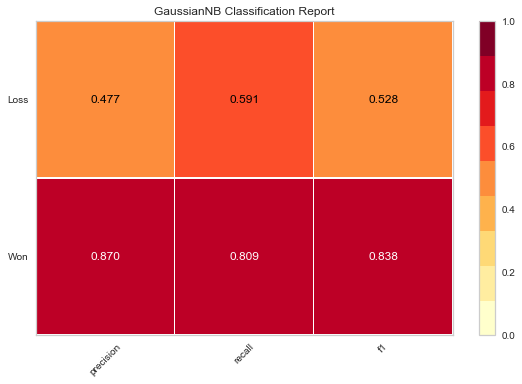

In [15]:
from yellowbrick.classifier import ClassificationReport

# create classification model and visualizer
visualizer = ClassificationReport(gnb, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # fit training data to visualizer
visualizer.score(data_test, target_test)  # evaluate model on test data
g = visualizer.poof()      

## linearSVC

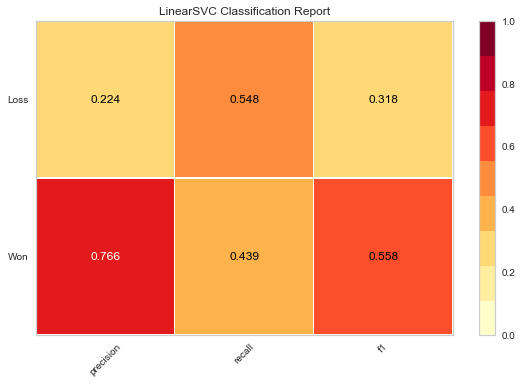

In [16]:
# create classification model and visualizer
visualizer = ClassificationReport(svc_model, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # fit training data to visualizer
visualizer.score(data_test, target_test)  # evaluate model on test data
svc = visualizer.poof()      

## k-neighbors classifier

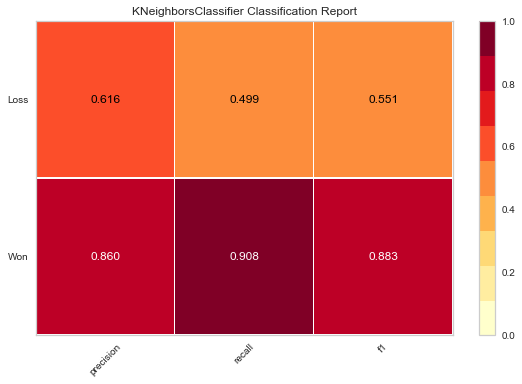

In [17]:
# create classification model and visualizer
visualizer = ClassificationReport(neigh, classes=['Won','Loss'])

visualizer.fit(data_train, target_train)  # fit training data to visualizer
visualizer.score(data_test, target_test)  # evaluate model on test data
kn = visualizer.poof()      